# Computer Vision with tensorflow (CNN): 🌸| Flowers 

I'm going to work with 16 classes of flowers (Multi-class classification)

The data Iam going to work with is the **Flowers** dataset from kaggle: https://www.kaggle.com/datasets/l3llff/flowers



In [1]:
# Import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import the data and become one with it.

Download the data from google drive.

If you want to see how to get data from Kaggle and split it flow this linke: https://github.com/zain2525/TensorFlow-Computer-Vision-project/blob/main/Prepare_flower_data.ipynb

In [2]:
!gdown --id 1SLDNPYcuDbt300xekB9oyRpf-pEsgNph

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1SLDNPYcuDbt300xekB9oyRpf-pEsgNph
To: /content/Flowers.zip
100% 239M/239M [00:28<00:00, 8.46MB/s]


Unzip the data

In [3]:
import zipfile

# Unzip our data
zip_ref = zipfile.ZipFile("Flowers.zip", "r")
zip_ref.extractall()
zip_ref.close()

How many images in each folder?

In [4]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("/content/content/Flowers"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/content/content/Flowers'.
There are 16 directories and 0 images in '/content/content/Flowers/train'.
There are 0 directories and 800 images in '/content/content/Flowers/train/black_eyed_susan'.
There are 0 directories and 698 images in '/content/content/Flowers/train/bellflower'.
There are 0 directories and 817 images in '/content/content/Flowers/train/california_poppy'.
There are 0 directories and 782 images in '/content/content/Flowers/train/calendula'.
There are 0 directories and 838 images in '/content/content/Flowers/train/magnolia'.
There are 0 directories and 843 images in '/content/content/Flowers/train/iris'.
There are 0 directories and 841 images in '/content/content/Flowers/train/dandelion'.
There are 0 directories and 785 images in '/content/content/Flowers/train/water_lily'.
There are 0 directories and 589 images in '/content/content/Flowers/train/astilbe'.
There are 0 directories and 821 images in '/content/content/Flowers/train/s

In [57]:
# Getting our train, validation and test directory
train_dir = "/content/content/Flowers/train/"
val_dir= "/content/content/Flowers/val/"
test_dir = "/content/content/Flowers/test/" 

In [6]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['astilbe' 'bellflower' 'black_eyed_susan' 'calendula' 'california_poppy'
 'carnation' 'common_daisy' 'coreopsis' 'daffodil' 'dandelion' 'iris'
 'magnolia' 'rose' 'sunflower' 'tulip' 'water_lily']


In [7]:
# Let's see how many class we have
len(class_names)

16

Let's visulize a random image?

In [8]:
import matplotlib.image as mpimg
import random

In [9]:
# Let's define a function to view random image
def view_random_image(target_dir, target_class):
  # Setup the target directory(we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlob
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (256, 256, 3)


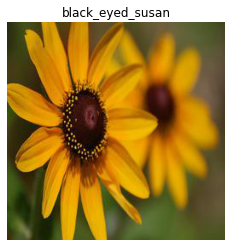

In [10]:
# Visulize
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## Preprocess the data (prepare it for the model)

In [11]:
# Setup data inputs
IMG_SIZE = (150, 150)

# Load data in from directores and turn it into batches
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                  label_mode="categorical",
                                                                  image_size=IMG_SIZE)

# load data in directores and turn it into batches
val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                               label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

# load data in directores and turn it into batches 
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

Found 12586 files belonging to 16 classes.
Found 2355 files belonging to 16 classes.
Found 799 files belonging to 16 classes.


As we can see there are 12586 image in the train data divided on 16 Classes. And there are 2355 image in validatuon data divided on 16 classes. And there 799 image in test data divided on 16 classes.

And that's it! Our data augmentation Sequential model is ready to go. As you'll see shortly, we'll be able to slot this `model`.

But before we do that, let's test it out by passing random images through it.

## Create the model

In [12]:
# Make the creating of our model a littel easier
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [24]:
# Create inputs for the model
inputs = layers.Input(shape=(150, 150, 3))
# Add the preprocessing/augmentation layers.
x = layers.RandomFlip('horizontal')(inputs)
x = tf.keras.layers.RandomRotation(0.2)(x)
x = tf.keras.layers.RandomZoom(0.2)(x)
x = tf.keras.layers.Rescaling(1./255)(x)
# Add the model layers.
x = Conv2D(32, 3, activation="relu")(x)
x = MaxPool2D()(x)
x = Conv2D(64, 3, activation="relu")(x)
x = MaxPool2D()(x)
x = Conv2D(128, 3, activation="relu")(x)
x = MaxPool2D()(x)
x = Conv2D(128, 3, activation="relu")(x)
x = MaxPool2D()(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = Dense(16, activation='softmax')(x)
# model
model = keras.Model(inputs, outputs)

# model summary
model.summary() 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 150, 150, 3)       0         
                                                                 
 random_rotation_2 (RandomRo  (None, 150, 150, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_2 (RandomZoom)  (None, 150, 150, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                           

In [25]:
# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

In [26]:
# Fit the model
history = model.fit(train_data,
                        epochs=40,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=int(.25 * len(val_data)))

Epoch 1/40
394/394 [==============================] - 26s 63ms/step - loss: 1.8724 - accuracy: 0.3531 - val_loss: 1.7699 - val_accuracy: 0.3733
Epoch 2/40
394/394 [==============================] - 27s 68ms/step - loss: 1.4228 - accuracy: 0.5199 - val_loss: 1.3141 - val_accuracy: 0.5208
Epoch 3/40
394/394 [==============================] - 25s 62ms/step - loss: 1.2535 - accuracy: 0.5762 - val_loss: 1.3717 - val_accuracy: 0.4965
Epoch 4/40
394/394 [==============================] - 25s 64ms/step - loss: 1.1350 - accuracy: 0.6171 - val_loss: 1.3552 - val_accuracy: 0.5226
Epoch 5/40
394/394 [==============================] - 25s 62ms/step - loss: 1.0422 - accuracy: 0.6502 - val_loss: 1.0432 - val_accuracy: 0.6389
Epoch 6/40
394/394 [==============================] - 25s 63ms/step - loss: 0.9616 - accuracy: 0.6760 - val_loss: 1.1576 - val_accuracy: 0.6146
Epoch 7/40
394/394 [==============================] - 26s 64ms/step - loss: 0.9053 - accuracy: 0.6959 - val_loss: 1.0945 - val_accuracy:

## Evaulate the model

In [27]:
# Evalaute on all validation data
model_results = model.evaluate(val_data)
model_results

74/74 [==============================] - 2s 29ms/step - loss: 0.6575 - accuracy: 0.8170


[0.657538115978241, 0.8169851303100586]

In [28]:
# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returnes separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

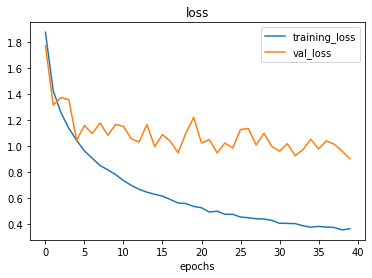

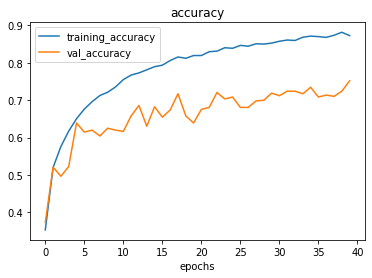

In [29]:
# Cheak out the model's loss curves on the 10 classes
plot_loss_curves(history)

## Making predictions with our trained model

To evaluate our trained model, we need to make some predictions with it and then compare those predictions to the test dataset.

Because the model has never seen the test dataset, this should give us an indication of how the model will perform in the real world on data similar to what it has been trained on.

In [30]:
# Make predictions with model
pred_probs = model.predict(val_data, verbose=1) # set verbosity to see how long it will take 

74/74 [==============================] - 2s 30ms/step


In [31]:
# How many predictions are there?
len(pred_probs)

2355

In [32]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([ 0,  0,  0,  0,  0, 14,  0,  0,  0,  5])

Beautiful! We've now got the predicted class index for each of the samples in our validation dataset.

We'll be able to compare these to the validation dataset labels to further evaluate our model.

**Note:** This unravelling is why we `shuffle=False` when creating the validation data object. Otherwise, whenever we loaded the validation dataset (like when making predictions), it would be shuffled every time, meaning if we tried to compare our predictions to the labels, they would be in different orders.

In [33]:
y_labels = []
for images, labels in val_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Nice! Since `val_data` isn't shuffled, the `y_labels` array comes back in the same order as the `pred_classes` array.

In [34]:
# How many labels are there? (should be the same as how many prediction probabilities we have)
len(y_labels)

2355

A very simple evaluation is to use Scikit-Learn's `accuracy_score()` function which compares truth labels to predicted labels and returns an accuracy score.

If we've created our `y_labels` and `pred_classes` arrays correctly, this should return the same accuracy value (or at least very close) as the `evaluate()` method we used earlier.

In [35]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.8169851380042463

Okay, now let's create a confusion_matrix

## Create Confusion Matrix

Right now our predictions and truth labels are in the form of integers, however, they'll be much easier to understand if we get their actual names. We can do so using the `class_names` attribute on our `val_data` object.

In [36]:
# Get the class names
class_names = val_data.class_names

In [37]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

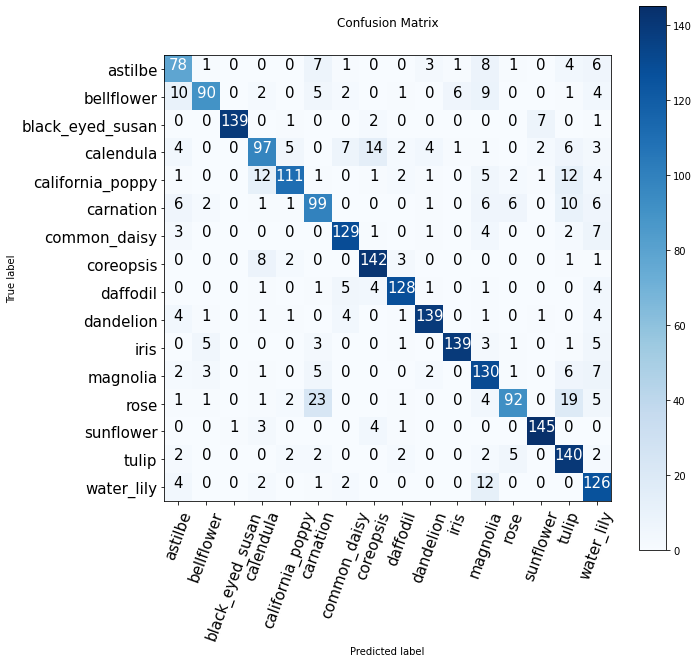

In [38]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(10, 10),
                      text_size=15,
                      norm=False,
                      savefig=True)

Now we can see how it gives us insight into which classes its getting "confused" on.

The good news is, the majority of the predictions are right down the top left to bottom right diagonal, meaning they're correct.

It looks like the model gets most confused on classes which look visualually similar


Since we're working on a classification problem, we can further evaluate our model's predictions using Scikit-Learn's `classification_report()` function.


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       110
           1       0.87      0.69      0.77       130
           2       0.99      0.93      0.96       150
           3       0.75      0.66      0.71       146
           4       0.89      0.73      0.80       153
           5       0.67      0.72      0.69       138
           6       0.86      0.88      0.87       147
           7       0.85      0.90      0.87       157
           8       0.90      0.88      0.89       145
           9       0.91      0.89      0.90       157
          10       0.95      0.88      0.91       158
          11       0.70      0.83      0.76       157
          12       0.85      0.62      0.72       149
          13       0.93      0.94      0.94       154
          14       0.69      0.89      0.78       157
          15       0.68      0.86      0.76       147

    accuracy                           0.82      2355
   macro avg       0.82   

The `classification_report()` outputs the precision, recall and f1-score's per class.

The above output is helpful but with so many classes, it's a bit hard to understand.

Let's see if we make it easier with the help of a visualization.

First, we'll get the output of `classification_report()` as a dictionary by setting `output_dict=True`.

In [40]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.6782608695652174,
  'recall': 0.7090909090909091,
  'f1-score': 0.6933333333333334,
  'support': 110},
 '1': {'precision': 0.8737864077669902,
  'recall': 0.6923076923076923,
  'f1-score': 0.7725321888412017,
  'support': 130},
 '2': {'precision': 0.9928571428571429,
  'recall': 0.9266666666666666,
  'f1-score': 0.9586206896551723,
  'support': 150},
 '3': {'precision': 0.751937984496124,
  'recall': 0.6643835616438356,
  'f1-score': 0.7054545454545454,
  'support': 146},
 '4': {'precision': 0.888,
  'recall': 0.7254901960784313,
  'f1-score': 0.7985611510791366,
  'support': 153},
 '5': {'precision': 0.673469387755102,
  'recall': 0.717391304347826,
  'f1-score': 0.6947368421052631,
  'support': 138},
 '6': {'precision': 0.86,
  'recall': 0.8775510204081632,
  'f1-score': 0.8686868686868686,
  'support': 147},
 '7': {'precision': 0.8452380952380952,
  'recall': 0.9044585987261147,
  'f1-score': 0.8738461538461538,
  'support': 157},
 '8': {'precision': 0.90140845

Alright, there's still a fair few values here, how about we narrow down?

Since the `f1-score` combines precision and recall in one metric, let's focus on that.

To extract it, we'll create an empty dictionary called `class_f1_scores` and then loop through each item in `classification_report_dict`, appending the class name and f1-score as the key, value pairs in `class_f1_scores`.

In [41]:

# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'astilbe': 0.6933333333333334,
 'bellflower': 0.7725321888412017,
 'black_eyed_susan': 0.9586206896551723,
 'calendula': 0.7054545454545454,
 'california_poppy': 0.7985611510791366,
 'carnation': 0.6947368421052631,
 'common_daisy': 0.8686868686868686,
 'coreopsis': 0.8738461538461538,
 'daffodil': 0.89198606271777,
 'dandelion': 0.8996763754045308,
 'iris': 0.9114754098360656,
 'magnolia': 0.7580174927113703,
 'rose': 0.7159533073929961,
 'sunflower': 0.9354838709677419,
 'tulip': 0.7799442896935933,
 'water_lily': 0.7590361445783133}

Looking good!

It seems like our dictionary is ordered by the class names. However, I think if we're trying to visualize different scores, it might look nicer if they were in some kind of order.

How about we turn our `class_f1_scores` dictionary into a pandas DataFrame and sort it in ascending fashion?

In [42]:
# Turn f1-scores into dataframe for visualization
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

,class_name,f1-score
2,black_eyed_susan,0.958621
13,sunflower,0.935484
10,iris,0.911475
9,dandelion,0.899676
8,daffodil,0.891986
7,coreopsis,0.873846
6,common_daisy,0.868687
4,california_poppy,0.798561
14,tulip,0.779944
1,bellflower,0.772532


Now we're talking! Let's finish it off with a nice horizontal bar chart.

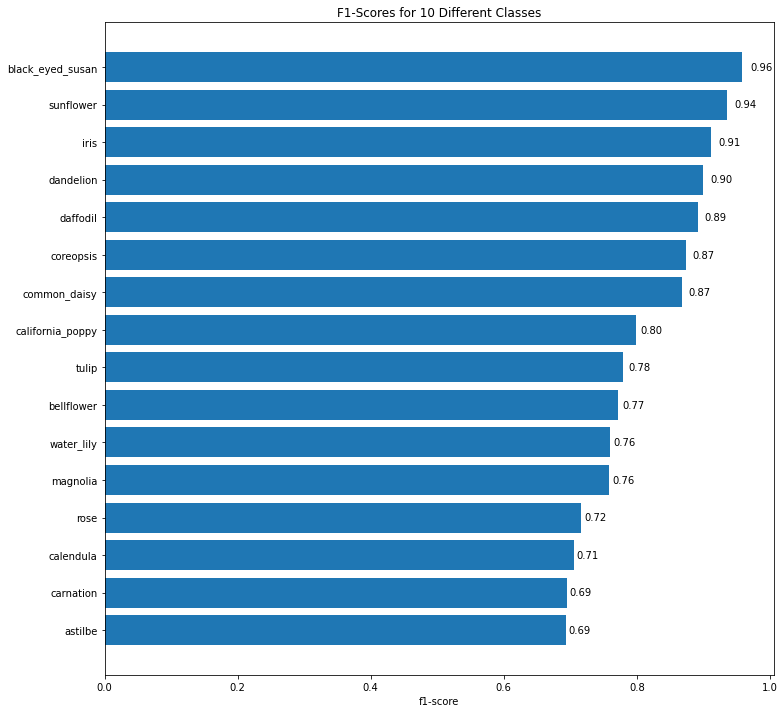

In [44]:
fig, ax = plt.subplots(figsize=(12, 12))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): 
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

Now that's a good looking graph! I mean, the text positioning could be improved a little but it'll do for now.

Can you see how visualizing our model's predictions gives us a completely new insight into its performance?

It seems like our model performs fairly poorly on classes like `astilbe` and `camation` while for classes like `black_eyed_susan` and `sunflower` the performance is quite outstanding.

Now let's visualize some of the most poor performing classes.

## Finding the most wrong predictions

These most wrong predictions can help to give further insight into your model's performance.

In [45]:
# 1. Get the filenames of all of our test data
filepaths = []
for filepath in test_data.list_files("/content/content/Flowers/val/*/*.jpg", 
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]


[b'/content/content/Flowers/val/astilbe/1052212431_4963309d03_c.jpg',
 b'/content/content/Flowers/val/astilbe/1074784463_46a8df182c_c.jpg',
 b'/content/content/Flowers/val/astilbe/14495221492_56a9c0d932_c.jpg',
 b'/content/content/Flowers/val/astilbe/14513116883_2e99ec5feb_c.jpg',
 b'/content/content/Flowers/val/astilbe/14525825511_9540550d85_c.jpg',
 b'/content/content/Flowers/val/astilbe/14618332759_73f7691caf_c.jpg',
 b'/content/content/Flowers/val/astilbe/14868137554_af26230c9d_c.jpg',
 b'/content/content/Flowers/val/astilbe/152090956_75d2a3d2fe_c.jpg',
 b'/content/content/Flowers/val/astilbe/1620702667_fefaae42b1_c.jpg',
 b'/content/content/Flowers/val/astilbe/16437319264_c5887d6b09_c.jpg']

Now we've got all of the test image filepaths, let's combine them into a DataFrame along with:

* Their ground truth labels (y_labels).
* The class the model predicted (pred_classes).
* The maximum prediction probabilitity value (pred_probs.max(axis=1)).
* The ground truth class names.
* The predicted class names.

In [46]:
# 2. Create a dataframe out of current prediction data for analysis
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]}) 
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname
0,b'/content/content/Flowers/val/astilbe/1052212...,0,0,0.999998,astilbe,astilbe
1,b'/content/content/Flowers/val/astilbe/1074784...,0,0,0.880946,astilbe,astilbe
2,b'/content/content/Flowers/val/astilbe/1449522...,0,0,0.997991,astilbe,astilbe
3,b'/content/content/Flowers/val/astilbe/1451311...,0,0,0.838851,astilbe,astilbe
4,b'/content/content/Flowers/val/astilbe/1452582...,0,0,0.994334,astilbe,astilbe


How about we make a simple column telling us whether or not the prediction is right or wrong.

In [47]:
# 3. Is the prediction correct?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,b'/content/content/Flowers/val/astilbe/1052212...,0,0,0.999998,astilbe,astilbe,True
1,b'/content/content/Flowers/val/astilbe/1074784...,0,0,0.880946,astilbe,astilbe,True
2,b'/content/content/Flowers/val/astilbe/1449522...,0,0,0.997991,astilbe,astilbe,True
3,b'/content/content/Flowers/val/astilbe/1451311...,0,0,0.838851,astilbe,astilbe,True
4,b'/content/content/Flowers/val/astilbe/1452582...,0,0,0.994334,astilbe,astilbe,True


And now since we know which predictions were right or wrong and along with their prediction probabilities, how about we get the 10 "most wrong" predictions by sorting for wrong predictions and descending prediction probabilties?

In [48]:
# 4. Get the top 10 wrong examples
top_10_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:10]
top_10_wrong.head(10)

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
306,b'/content/content/Flowers/val/black_eyed_susa...,2,13,0.999965,black_eyed_susan,sunflower,False
963,b'/content/content/Flowers/val/common_daisy/87...,6,15,0.999938,common_daisy,water_lily,False
1474,b'/content/content/Flowers/val/iris/2567025932...,10,15,0.999808,iris,water_lily,False
314,b'/content/content/Flowers/val/black_eyed_susa...,2,13,0.999622,black_eyed_susan,sunflower,False
1871,b'/content/content/Flowers/val/rose/7349605322...,12,14,0.999207,rose,tulip,False
1867,b'/content/content/Flowers/val/rose/68963342_5...,12,5,0.997800,rose,carnation,False
1985,b'/content/content/Flowers/val/sunflower/45504...,13,2,0.997535,sunflower,black_eyed_susan,False
402,b'/content/content/Flowers/val/calendula/15327...,3,7,0.997520,calendula,coreopsis,False
1267,b'/content/content/Flowers/val/daffodil/862195...,8,6,0.996706,daffodil,common_daisy,False
450,b'/content/content/Flowers/val/calendula/39790...,3,7,0.996608,calendula,coreopsis,False


It might be easier if we visualize them.

let's create a function to load and prepare the images

In [49]:
def load_and_prep_image(filename, img_shape=150, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (150, 150, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

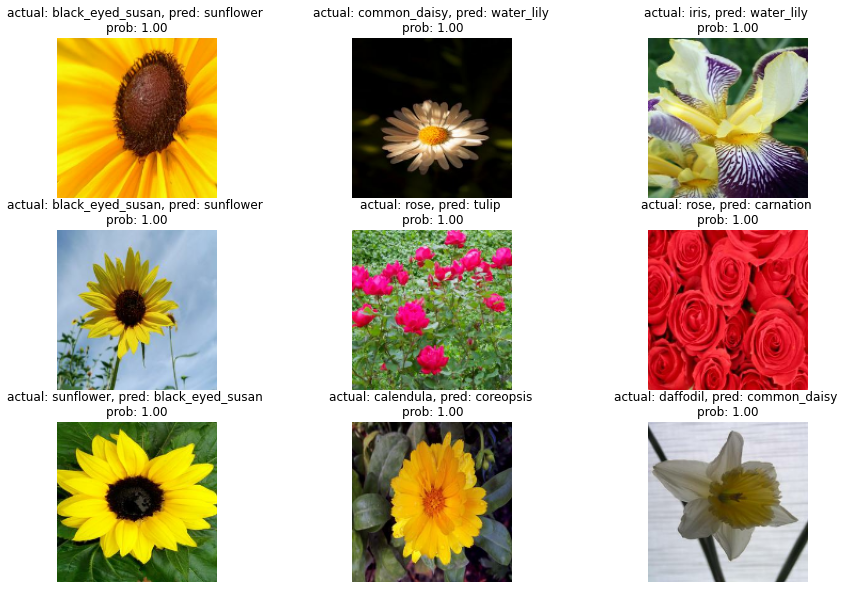

In [53]:
# 5. Visualize some of the most wrong examples
images_to_view = 9
start_index = 0 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_10_wrong[start_index:start_index+images_to_view].itertuples()): 
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False);

Now it's time to test our model on the test data (data the model hasn't seen).

### Visualizing predictions on test images

Time for the real test. Visualizing predictions on actual images. You can look at all the metrics you want but until you've visualized some predictions, you won't really know how your model is performing.

1/1 [==============================] - 0s 19ms/step


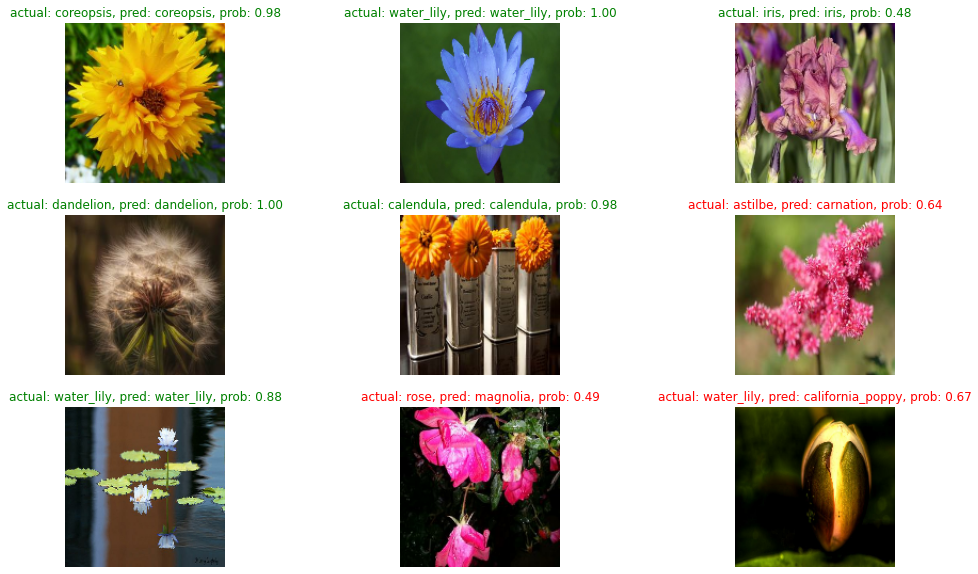

In [60]:
# Make preds on a series of random images
plt.figure(figsize=(17, 10))
for i in range(9):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(3, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

After going through enough random samples, it starts to become clear that the model tends to make far worse predictions on classes which are visually similar 